In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

import struct

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
% cd '/content/drive/My Drive/Colab Notebooks/Omdena'

/content/drive/My Drive/Colab Notebooks/Omdena


In [0]:
df = pd.read_csv("Master_708.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'SID', 'ISO', 'NAME', 'BASIN', 'SUBBASIN', 'NATURE',
       'TRACK_TYPE', 'ISO_TIME', 'COORDS', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'PRES_CALC_mean', 'STORM_SPD_mean', 'STORM_DR_mean',
       'genesis_basin', 'v_land_kn', '34kn_pop', '34kn_assets', '64kn_pop',
       '64kn_assets', '96kn_pop', '96kn_assets', 'Year', 'Event name',
       'Num homeless', 'Total affected', 'Total damage ('000$)', 'CPI',
       'Final_Num_Affected', 'Final_Num_Homeless', 'Final_Num_Injured'],
      dtype='object')

In [0]:
df_aff = df[ df['Final_Num_Affected']>0 ]

In [6]:
df_aff = df_aff.dropna()
df_aff

,Unnamed: 0,SID,ISO,NAME,BASIN,SUBBASIN,NATURE,TRACK_TYPE,ISO_TIME,COORDS,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_mean,STORM_SPD_mean,STORM_DR_mean,genesis_basin,v_land_kn,34kn_pop,34kn_assets,64kn_pop,64kn_assets,96kn_pop,96kn_assets,Year,Event name,Num homeless,Total affected,Total damage ('000$),CPI,Final_Num_Affected,Final_Num_Homeless,Final_Num_Injured
67,67,1970250N15140,PHL,GEORGIA,WP,WP,TS,main,"['1970-09-11 03:00:00', '1970-09-11 06:00:00']","[[16.36, 121.38], [16.68, 120.76]]",3,0,3,2.0,939.000000,13.000000,297.500000,WP,152.4,45155148.0,3.702133e+11,6208814.0,7.242455e+10,2057152.0,2.823488e+10,1970,GEORGIA,67200.0,145200.0,2353.0,15.186335,145200,67200,0.0
78,78,1973284N12144,PHL,RUTH,WP,WP,TS,main,"['1973-10-15 15:00:00', '1973-10-15 18:00:00']","[[15.68, 121.25], [15.82, 120.4]]",3,3,0,0.0,975.500000,16.000000,279.000000,WP,112.1,40269202.0,3.588365e+11,8410657.0,9.625789e+10,99495.0,2.577162e+09,1973,RUTH,45000.0,45000.0,5000.0,17.366986,45000,45000,0.0
120,120,1980197N07154,PHL,JOE,WP,WP,TS,main,"['1980-07-20 18:00:00', '1980-07-20 21:00:00',...","[[16.96, 122.18], [17.03, 121.36], [17.13, 120...",6,0,6,1.0,958.333333,16.000000,281.000000,WP,108.9,18752814.0,1.640958e+11,5172626.0,5.133916e+10,259805.0,3.126265e+09,1980,JOE,300000.0,600000.0,15400.0,32.233893,600000,300000,200.0
134,134,1982229N09154,JPN,ELLIS,WP,WP,TS,main,"['1982-08-26 18:00:00', '1982-08-26 21:00:00',...","[[31.93, 131.54], [32.68, 131.69], [34.63, 131...",9,0,9,0.0,960.666667,18.000000,6.666667,WP,86.8,16693400.0,2.308674e+12,3360670.0,4.697827e+11,0.0,0.000000e+00,1982,ELLIS,5000.0,5000.0,18000.0,37.745822,5000,5000,0.0
155,155,1986027S13145,AUS,WINIFRED,NAm,NAm,TS,main,"['1986-02-01 09:00:00', '1986-02-01 12:00:00',...","[[-17.59, 146.06], [-17.79, 145.65], [-18.06, ...",6,6,0,-1.0,998.571429,5.542857,160.085714,SP,108.4,420982.0,3.768732e+10,76660.0,1.011968e+10,15849.0,2.084454e+09,1986,WINIFRED,1000.0,1012.0,70000.0,42.873130,1012,1000,12.0
157,157,1986135S07160,SLB,NAMU,SP,SP,TS,main,['1986-05-18 21:00:00'],"[[-9.85, 160.47]]",0,0,0,0.0,964.500000,7.000000,238.000000,SP,90.9,400718.0,3.282076e+09,226002.0,1.853533e+09,0.0,0.000000e+00,1986,NAMU,60000.0,150000.0,20000.0,42.873130,150000,60000,0.0
165,165,1987245N15133,CHN,GERALD,WP,WP,TS,main,"['1987-09-10 12:00:00', '1987-09-10 15:00:00',...","[[24.9, 118.57], [25.29, 118.29], [25.71, 117....",9,8,1,-1.0,992.416667,11.250000,320.250000,WP,64.3,19624064.0,4.021749e+11,0.0,0.000000e+00,0.0,0.000000e+00,1987,GERALD,25400.0,25400.0,120000.0,44.444238,25400,25400,6.0
180,180,1989142N11114,VNM,CECIL,WP,WP,TS,main,"['1989-05-24 21:00:00', '1989-05-25 00:00:00',...","[[15.96, 108.22], [16.08, 107.92], [16.27, 107...",21,0,21,-1.0,986.729167,7.625000,293.750000,WP,85.8,8418251.0,5.188003e+10,4044310.0,2.288200e+10,0.0,0.000000e+00,1989,CECIL,336000.0,336106.0,21000.0,48.489365,336106,336000,106.0
192,192,1989305N07105,THA,GAY,WP,WP,TS,main,['1989-11-04 06:00:00'],"[[10.79, 99.07]]",0,0,0,3.0,977.500000,9.000000,291.000000,WP,120.4,3179300.0,1.853324e+10,704424.0,4.126683e+09,347920.0,2.029228e+09,1989,GAY,45000.0,199000.0,452000.0,48.489365,199000,45000,0.0
212,212,1991220N10133,VNM,FRED,WP,WP,TS,main,"['1991-08-17 09:00:00', '1991-08-17 12:00:00']","[[17.98, 106.28], [17.83, 105.75]]",3,3,0,0.0,977.833333,11.000000,253.000000,WP,90.7,7462952.0,4.291989e+10,2141246.0,1.263264e+10,0.0,0.000000e+00,1991,FRED,455905.0,455921.0,9500.0,53.271157,455921,455905,5000.0


In [7]:
df_aff.shape

(36, 34)

In [0]:
le = preprocessing.LabelEncoder()
df_aff['Final_Num_Affected'] = le.fit_transform(df_aff['Final_Num_Affected'])

### Predicting number affected based on total hours (K-means)

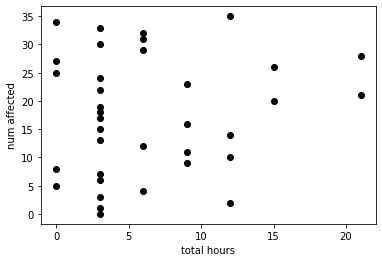

In [9]:
X = df_aff[["TOTAL_HRS", "Final_Num_Affected"]]
plt.scatter(X["TOTAL_HRS"], X["Final_Num_Affected"], c='black' )
plt.xlabel("total hours")
plt.ylabel("num affected")
plt.show()

In [10]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
Kmean.cluster_centers_

array([[ 7.875     , 12.5       ],
       [ 3.        , 21.875     ],
       [ 3.66666667,  4.        ],
       [18.        , 23.75      ],
       [ 5.14285714, 32.        ]])

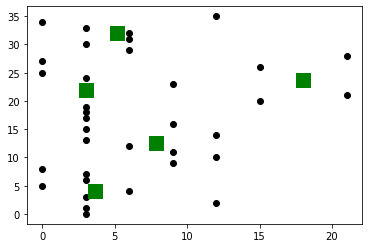

In [12]:
plt.scatter(X["TOTAL_HRS"], X['Final_Num_Affected'], c='black')
for center in Kmean.cluster_centers_:
    plt.scatter(center[0], center[1], s=200, c='g', marker='s')
plt.show()

### Predicting number affected based on storm mean speed (K-means)

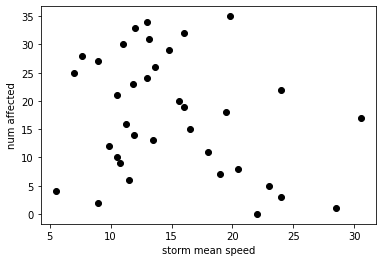

In [13]:
X = df_aff[["STORM_SPD_mean", "Final_Num_Affected"]]
plt.scatter(X["STORM_SPD_mean"], X["Final_Num_Affected"], c='black' )
plt.xlabel("storm mean speed")
plt.ylabel("num affected")
plt.show()

In [14]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
Kmean.cluster_centers_

array([[10.4405059 ,  9.55555556],
       [10.375     , 24.85714286],
       [20.01428571, 17.42857143],
       [14.24962406, 32.        ],
       [22.82070707,  4.        ]])

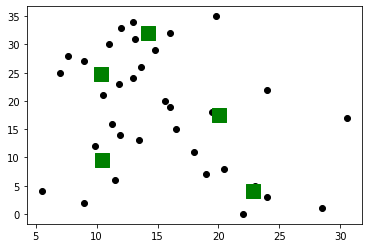

In [16]:
plt.scatter(X["STORM_SPD_mean"], df_aff['Final_Num_Affected'], c='black')
for center in Kmean.cluster_centers_:
    plt.scatter(center[0], center[1], s=200, c='g', marker='s')
plt.show()

### Predicting number affected based on both total hours and storm mean speed (K-means)

In [0]:
X_n = df_aff[["STORM_SPD_mean", "TOTAL_HRS", "Final_Num_Affected"]]

In [0]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X_n)
labels = kmeans.predict(X_n)

In [19]:
k = kmeans.cluster_centers_
k

array([[12.87473684,  3.9       , 30.        ],
       [11.19645531,  8.1       ,  9.7       ],
       [11.845     , 16.2       , 23.6       ],
       [21.3       ,  3.        , 18.2       ],
       [22.82070707,  2.        ,  4.        ]])

In [0]:
x = np.asarray(X_n["STORM_SPD_mean"])
y = np.asarray(X_n["TOTAL_HRS"])
z = np.asarray(X_n["Final_Num_Affected"])

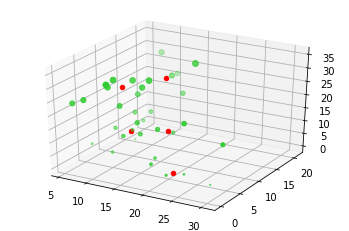

In [21]:
ax = plt.axes(projection='3d')

def addPoint(scat, new_point, c='k'):
    old_off = scat.get_offsets()
    new_off = np.concatenate([old_off,np.array(new_point, ndmin=3)])
    old_c = scat.get_facecolors()
    new_c = np.concatenate([old_c, np.array(matplotlib.colors.to_rgba(c), ndmin=3)])

    scat.set_offsets(new_off)
    scat.set_facecolors(new_c)

    scat.axes.figure.canvas.draw_idle()


# Data for three-dimensional scattered points
scat = ax.scatter3D(x, y, z, s=z, c="limegreen")
for i in range(len(k)):
  scat = ax.scatter3D(k[i][0], k[i][1], k[i][2], color='red')

